## Content

[1. Import libraries](#Import_libraries)<br>
[2. Import data](#Import_data)<br>
[3.Data cleaning](#Data_cleaning)<br>
[- Removing lines with sold cars](#Removing_lines_with_sold_cars)<br>
[- Shifting data with missing columns 1 column to the right](#Shifting_data_with_missing_columns_1_column_to_the_right)<br>
[- Removing extra spaces](#Removing_extra_spaces)<br>
[- Shifting data on right columns](#Shifting_data_on_right_columns)<br>
[- Split data in "auto_engine" into 3 columns](#Split_auto_engine)<br>
[- Formating columns (Dtype, creating new columns, etc.)](#Formating_columns)<br>
[4. Exploratory data analysis](#Exploratory_data_analysis)<br>

<a id='Import_libraries'></a>
<h2>Import libraries</h2>

In [1019]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics 
from sklearn.metrics import mean_squared_error

<a id='Import_data'></a>
## Import data

In [1021]:
data = pd.read_csv("auto_data.csv", sep=';')
data.shape

(4060, 13)

In [1022]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               4043 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          4043 non-null   object
 3   auto_owners        4043 non-null   object
 4   auto_guarantee     4043 non-null   object
 5   auto_mileage       4043 non-null   object
 6   auto_engine        4043 non-null   object
 7   auto_transmission  4043 non-null   object
 8   auto_drive_unit    4043 non-null   object
 9   auto_wheel         4043 non-null   object
 10  auto_carcase       4031 non-null   object
 11  auto_color         3714 non-null   object
 12  link               4060 non-null   object
dtypes: object(13)
memory usage: 412.5+ KB


We see that there is a lot of data without info on car price. Cars with empty 'auto_price' column were sold, but information about them was not removed from the website.

<a id='Data_cleaning'></a>
## Data cleaning

<a id='Removing_lines_with_sold_cars'></a>
### Removing lines with sold cars 

In [1023]:
data = data.dropna(subset=['auto_price'])

In [1024]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 3745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               2159 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          2159 non-null   object
 3   auto_owners        2159 non-null   object
 4   auto_guarantee     2159 non-null   object
 5   auto_mileage       2159 non-null   object
 6   auto_engine        2159 non-null   object
 7   auto_transmission  2159 non-null   object
 8   auto_drive_unit    2159 non-null   object
 9   auto_wheel         2159 non-null   object
 10  auto_carcase       2149 non-null   object
 11  auto_color         1964 non-null   object
 12  link               2159 non-null   object
dtypes: object(13)
memory usage: 236.1+ KB


There are also some empty cells in 'auto_color' column.
Actually, data on some cars were shifted 1 column to the left as those cars has empty 'auto_guarantee' column (which means that cars doesn't have guarantee).

<a id='Shifting_data_with_missing_columns_1_column_to_the_right'></a>
### Shifting data with missing guarantee 1 column to the right

In [1025]:
data['guarantee'] = 1
#data
data.loc[data['auto_color'].isnull(), ['guarantee']] = 0

In [1026]:
data_to_shift = data.loc[data['guarantee'] == 0]
data = data.drop(data[data['guarantee'] == 0].index)
data_to_shift.shape, data.shape

((195, 14), (1964, 14))

In [1027]:
data_to_shift

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
45,\n Mercedes C-Класс АКПП 2016 с пробего...,\n 1 750 000 ₽,\n 110 000 км\n,\n 5 владельцев ...,\n 2016,\n 1.6 л /\n 156 л.с...,\n Автоматическая,\n Задний,Левый,\n Седан,\n Красный,NaN,https://rolf-probeg.ru//spb/cars/mercedes/c-kl...,0
74,\n Peugeot 308 АКПП 2010 с пробегом 162...,\n 400 000 ₽,\n 162 760 км\n,\n 2 владельца ...,\n 2010,\n 1.6 л /\n 120 л.с...,\n Автоматическая,\n Передний,Левый,\n Хэтчбек 5 дв.,\n Черный,NaN,https://rolf-probeg.ru//spb/cars/peugeot/308/1...,0
85,\n Mazda CX-3 АКПП 2018 с пробегом 29 6...,\n 2 095 000 ₽,\n 29 624 км\n,\n 1 владелец ...,\n 2018,\n 1.5 л /\n 105 л.с...,\n Автоматическая,\n Полный,Левый,\n Внедорожник 5 дв.,\n Красный,NaN,https://rolf-probeg.ru//spb/cars/mazda/cx_3/16...,0
132,\n Mercedes M-Класс АКПП 2011 с пробего...,\n 1 325 000 ₽,\n 155 657 км\n,\n 4 владельца ...,\n 2011,\n 3.5 л /\n 272 л.с...,\n Автоматическая,\n Полный,Левый,\n Внедорожник 5 дв.,\n Серый,NaN,https://rolf-probeg.ru//spb/cars/mercedes/m-kl...,0
142,\n Land Rover Range Rover Evoque АКПП 2...,\n 1 999 000 ₽,\n 107 000 км\n,\n 4 владельца ...,\n 2013,\n 2.2 л /\n 190 л.с...,\n Автоматическая,\n Полный,Левый,\n Внедорожник 3 дв.,\n Черный,NaN,https://rolf-probeg.ru//spb/cars/land-rover/ra...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,\n BMW 1 серии АКПП 2019 с пробегом 28 ...,\n 1 700 000 ₽,\n 28 863 км\n,\n 4 владельца ...,\n 2019,\n 1.5 л /\n 136 л.с...,\n Автоматическая,\n Задний,Левый,\n Хэтчбек 5 дв.,\n Синий,NaN,https://rolf-probeg.ru//spb/cars/bmw/1-serii/1...,0
2153,\n Hyundai Solaris АКПП 2021 с пробегом...,\n 1 400 000 ₽,\n 70 км\n,\n 1 владелец ...,\n 2021,\n 1.6 л /\n 123 л.с...,\n Автоматическая,\n Передний,Левый,\n Седан,\n Серый,NaN,https://rolf-probeg.ru//spb/cars/hyundai/solar...,0
2156,\n Volvo XC60 АКПП 2013 с пробегом 116 ...,\n 2 170 000 ₽,\n 116 900 км\n,\n 4 владельца ...,\n 2013,\n 2.4 л /\n 215 л.с...,\n Автоматическая,\n Полный,Левый,\n Внедорожник 5 дв.,\n Белый,NaN,https://rolf-probeg.ru//spb/cars/volvo/xc60/16...,0
2160,\n Toyota Camry АКПП 2015 с пробегом 13...,\n 1 550 000 ₽,\n 132 122 км\n,\n 5 владельцев ...,\n 2015,\n 2.0 л /\n 150 л.с...,\n Автоматическая,\n Передний,Левый,\n Седан,\n Черный,NaN,https://rolf-probeg.ru//spb/cars/toyota/camry/...,0


In [1028]:
data_to_shift['auto_color'] = data_to_shift['auto_carcase']
data_to_shift['auto_carcase'] = data_to_shift['auto_wheel']
data_to_shift['auto_wheel'] = data_to_shift['auto_drive_unit']
data_to_shift['auto_drive_unit'] = data_to_shift['auto_transmission']
data_to_shift['auto_transmission'] = data_to_shift['auto_engine']
data_to_shift['auto_engine'] = data_to_shift['auto_mileage']
data_to_shift['auto_mileage'] = data_to_shift['auto_year']
data_to_shift['auto_year'] = data_to_shift['auto_guarantee']
data_to_shift['auto_guarantee'] = "Нет гарантии"

In [1029]:
data_to_shift.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
45,\n Mercedes C-Класс АКПП 2016 с пробего...,\n 1 750 000 ₽,\n 2016,\n 5 владельцев ...,Нет гарантии,\n 110 000 км\n,\n 1.6 л /\n 156 л.с...,\n Автоматическая,\n Задний,Левый,\n Седан,\n Красный,https://rolf-probeg.ru//spb/cars/mercedes/c-kl...,0
74,\n Peugeot 308 АКПП 2010 с пробегом 162...,\n 400 000 ₽,\n 2010,\n 2 владельца ...,Нет гарантии,\n 162 760 км\n,\n 1.6 л /\n 120 л.с...,\n Автоматическая,\n Передний,Левый,\n Хэтчбек 5 дв.,\n Черный,https://rolf-probeg.ru//spb/cars/peugeot/308/1...,0
85,\n Mazda CX-3 АКПП 2018 с пробегом 29 6...,\n 2 095 000 ₽,\n 2018,\n 1 владелец ...,Нет гарантии,\n 29 624 км\n,\n 1.5 л /\n 105 л.с...,\n Автоматическая,\n Полный,Левый,\n Внедорожник 5 дв.,\n Красный,https://rolf-probeg.ru//spb/cars/mazda/cx_3/16...,0
132,\n Mercedes M-Класс АКПП 2011 с пробего...,\n 1 325 000 ₽,\n 2011,\n 4 владельца ...,Нет гарантии,\n 155 657 км\n,\n 3.5 л /\n 272 л.с...,\n Автоматическая,\n Полный,Левый,\n Внедорожник 5 дв.,\n Серый,https://rolf-probeg.ru//spb/cars/mercedes/m-kl...,0
142,\n Land Rover Range Rover Evoque АКПП 2...,\n 1 999 000 ₽,\n 2013,\n 4 владельца ...,Нет гарантии,\n 107 000 км\n,\n 2.2 л /\n 190 л.с...,\n Автоматическая,\n Полный,Левый,\n Внедорожник 3 дв.,\n Черный,https://rolf-probeg.ru//spb/cars/land-rover/ra...,0


In [1030]:
data_to_shift.shape

(195, 14)

In [1031]:
data = pd.concat([data, data_to_shift])

In [1032]:





data.shape

(2159, 14)

In [1033]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2927
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               2159 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          2159 non-null   object
 3   auto_owners        2159 non-null   object
 4   auto_guarantee     2159 non-null   object
 5   auto_mileage       2159 non-null   object
 6   auto_engine        2159 non-null   object
 7   auto_transmission  2159 non-null   object
 8   auto_drive_unit    2159 non-null   object
 9   auto_wheel         2159 non-null   object
 10  auto_carcase       2159 non-null   object
 11  auto_color         2149 non-null   object
 12  link               2159 non-null   object
 13  guarantee          2159 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 253.0+ KB


In [1034]:
data[data['auto_color'].isnull()]['link'].unique()

array(['https://rolf-probeg.ru//spb/cars/mitsubishi/pajero/16096144/',
       'https://rolf-probeg.ru//spb/cars/mitsubishi/pajero/16096132/',
       'https://rolf-probeg.ru//spb/cars/mazda/mx-30/16091848/',
       'https://rolf-probeg.ru//spb/cars/kia/carnival/16076387/',
       'https://rolf-probeg.ru//spb/cars/ford/f-150/16060346/',
       'https://rolf-probeg.ru//spb/cars/hyundai/grand-starex/16090529/',
       'https://rolf-probeg.ru//spb/cars/kia/carnival/16073953/',
       'https://rolf-probeg.ru//spb/cars/kia/optima/16091494/',
       'https://rolf-probeg.ru//spb/cars/hyundai/sonata/16074798/',
       'https://rolf-probeg.ru//spb/cars/lexus/gs/16069061/'],
      dtype=object)

In [1035]:
data_shift_1 = data[data['auto_color'].isnull()]
data = data.drop(data[data['auto_color'].isnull()].index)
data.shape, data_shift_1.shape

((2149, 14), (10, 14))

In [1036]:
data_shift_1

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
262,\n Mitsubishi Pajero АКПП 2021 с пробег...,\n 4 299 000 ₽,\n 22 км\n,\n 2021,Нет гарантии,\n 3.0 л /\n 174 л.с...,\n Автоматическая,\n Полный,Левый,\n Внедорожник 5 дв.,\n Серый,NaN,https://rolf-probeg.ru//spb/cars/mitsubishi/pa...,0
278,\n Mitsubishi Pajero АКПП 2021 с пробег...,\n 4 299 000 ₽,\n 21 км\n,\n 2021,Нет гарантии,\n 3.0 л /\n 174 л.с...,\n Автоматическая,\n Полный,Левый,\n Внедорожник 5 дв.,\n Серый,NaN,https://rolf-probeg.ru//spb/cars/mitsubishi/pa...,0
930,\n Mazda MX-30 АКПП 2020 с пробегом 2 4...,\n 2 690 000 ₽,\n 2 410 км\n,\n 2020,Нет гарантии,\n 0.0 л /\n 145 л.с...,\n Автоматическая,\n Передний,Левый,\n Внедорожник 5 дв.,\n Серый,NaN,https://rolf-probeg.ru//spb/cars/mazda/mx-30/1...,0
1130,\n Kia Carnival АКПП 2017 с пробегом 51...,\n 2 630 000 ₽,\n 51 978 км\n,\n 2017,Нет гарантии,\n 2.2 л /\n 202 л.с...,\n Автоматическая,\n Передний,Левый,\n Минивэн,\n Черный,NaN,https://rolf-probeg.ru//spb/cars/kia/carnival/...,0
1530,\n Ford F-150 АКПП 2019 с пробегом 59 0...,\n 4 899 000 ₽,\n 59 000 км\n,\n 2019,Нет гарантии,\n 3.5 л /\n 375 л.с...,\n Автоматическая,\n Полный,Левый,\n Пикап Двойная кабина Super Cre...,\n Черный,NaN,https://rolf-probeg.ru//spb/cars/ford/f-150/16...,0
1550,\n Hyundai Grand Starex АКПП 2018 с про...,\n 3 630 000 ₽,\n 40 269 км\n,\n 2018,Нет гарантии,\n 2.5 л /\n 175 л.с...,\n Автоматическая,\n Полный,Левый,\n Минивэн,\n Коричневый,NaN,https://rolf-probeg.ru//spb/cars/hyundai/grand...,0
1560,\n Kia Carnival АКПП 2017 с пробегом 51...,\n 2 700 000 ₽,\n 51 917 км\n,\n 2017,Нет гарантии,\n 2.2 л /\n 202 л.с...,\n Автоматическая,\n Передний,Левый,\n Минивэн,\n Белый,NaN,https://rolf-probeg.ru//spb/cars/kia/carnival/...,0
1580,\n Kia Optima АКПП 2018 с пробегом 83 0...,\n 1 880 000 ₽,\n 83 000 км\n,\n 2018,Нет гарантии,\n 2.4 л /\n 188 л.с...,\n Автоматическая,\n Передний,Левый,\n Седан,\n Белый,NaN,https://rolf-probeg.ru//spb/cars/kia/optima/16...,0
2099,\n Hyundai Sonata АКПП 2021 с пробегом ...,\n 2 630 000 ₽,\n 40 км\n,\n 2021,Нет гарантии,\n 2.5 л /\n 180 л.с...,\n Автоматическая,\n Передний,Левый,\n Седан,\n Белый,NaN,https://rolf-probeg.ru//spb/cars/hyundai/sonat...,0
2130,\n Lexus GS АКПП 2016 с пробегом 67 539...,\n 3 699 000 ₽,\n 67 539 км\n,\n 2016,Нет гарантии,\n 3.5 л /\n 311 л.с...,\n Автоматическая,\n Задний,Левый,\n Седан,\n Черный,NaN,https://rolf-probeg.ru//spb/cars/lexus/gs/1606...,0


In [1037]:
data_shift_1['auto_color'] = data_shift_1['auto_carcase']
data_shift_1['auto_carcase'] = data_shift_1['auto_wheel']
data_shift_1['auto_wheel'] = data_shift_1['auto_drive_unit']
data_shift_1['auto_drive_unit'] = data_shift_1['auto_transmission']
data_shift_1['auto_transmission'] = data_shift_1['auto_engine']
data_shift_1['auto_engine'] = data_shift_1['auto_year']
data_shift_1['auto_year'] = data_shift_1['auto_owners']
data_shift_1['auto_owners'] = "Нет данных"
data_shift_1

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
262,\n Mitsubishi Pajero АКПП 2021 с пробег...,\n 4 299 000 ₽,\n 2021,Нет данных,Нет гарантии,\n 3.0 л /\n 174 л.с...,\n 22 км\n,\n Автоматическая,\n Полный,Левый,\n Внедорожник 5 дв.,\n Серый,https://rolf-probeg.ru//spb/cars/mitsubishi/pa...,0
278,\n Mitsubishi Pajero АКПП 2021 с пробег...,\n 4 299 000 ₽,\n 2021,Нет данных,Нет гарантии,\n 3.0 л /\n 174 л.с...,\n 21 км\n,\n Автоматическая,\n Полный,Левый,\n Внедорожник 5 дв.,\n Серый,https://rolf-probeg.ru//spb/cars/mitsubishi/pa...,0
930,\n Mazda MX-30 АКПП 2020 с пробегом 2 4...,\n 2 690 000 ₽,\n 2020,Нет данных,Нет гарантии,\n 0.0 л /\n 145 л.с...,\n 2 410 км\n,\n Автоматическая,\n Передний,Левый,\n Внедорожник 5 дв.,\n Серый,https://rolf-probeg.ru//spb/cars/mazda/mx-30/1...,0
1130,\n Kia Carnival АКПП 2017 с пробегом 51...,\n 2 630 000 ₽,\n 2017,Нет данных,Нет гарантии,\n 2.2 л /\n 202 л.с...,\n 51 978 км\n,\n Автоматическая,\n Передний,Левый,\n Минивэн,\n Черный,https://rolf-probeg.ru//spb/cars/kia/carnival/...,0
1530,\n Ford F-150 АКПП 2019 с пробегом 59 0...,\n 4 899 000 ₽,\n 2019,Нет данных,Нет гарантии,\n 3.5 л /\n 375 л.с...,\n 59 000 км\n,\n Автоматическая,\n Полный,Левый,\n Пикап Двойная кабина Super Cre...,\n Черный,https://rolf-probeg.ru//spb/cars/ford/f-150/16...,0
1550,\n Hyundai Grand Starex АКПП 2018 с про...,\n 3 630 000 ₽,\n 2018,Нет данных,Нет гарантии,\n 2.5 л /\n 175 л.с...,\n 40 269 км\n,\n Автоматическая,\n Полный,Левый,\n Минивэн,\n Коричневый,https://rolf-probeg.ru//spb/cars/hyundai/grand...,0
1560,\n Kia Carnival АКПП 2017 с пробегом 51...,\n 2 700 000 ₽,\n 2017,Нет данных,Нет гарантии,\n 2.2 л /\n 202 л.с...,\n 51 917 км\n,\n Автоматическая,\n Передний,Левый,\n Минивэн,\n Белый,https://rolf-probeg.ru//spb/cars/kia/carnival/...,0
1580,\n Kia Optima АКПП 2018 с пробегом 83 0...,\n 1 880 000 ₽,\n 2018,Нет данных,Нет гарантии,\n 2.4 л /\n 188 л.с...,\n 83 000 км\n,\n Автоматическая,\n Передний,Левый,\n Седан,\n Белый,https://rolf-probeg.ru//spb/cars/kia/optima/16...,0
2099,\n Hyundai Sonata АКПП 2021 с пробегом ...,\n 2 630 000 ₽,\n 2021,Нет данных,Нет гарантии,\n 2.5 л /\n 180 л.с...,\n 40 км\n,\n Автоматическая,\n Передний,Левый,\n Седан,\n Белый,https://rolf-probeg.ru//spb/cars/hyundai/sonat...,0
2130,\n Lexus GS АКПП 2016 с пробегом 67 539...,\n 3 699 000 ₽,\n 2016,Нет данных,Нет гарантии,\n 3.5 л /\n 311 л.с...,\n 67 539 км\n,\n Автоматическая,\n Задний,Левый,\n Седан,\n Черный,https://rolf-probeg.ru//spb/cars/lexus/gs/1606...,0


In [1038]:
data = pd.concat([data, data_shift_1])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2130
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               2159 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          2159 non-null   object
 3   auto_owners        2159 non-null   object
 4   auto_guarantee     2159 non-null   object
 5   auto_mileage       2159 non-null   object
 6   auto_engine        2159 non-null   object
 7   auto_transmission  2159 non-null   object
 8   auto_drive_unit    2159 non-null   object
 9   auto_wheel         2159 non-null   object
 10  auto_carcase       2159 non-null   object
 11  auto_color         2159 non-null   object
 12  link               2159 non-null   object
 13  guarantee          2159 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 253.0+ KB


Ok, missing data were handled

<a id='Removing_extra_spaces'></a>
### Removing extra spaces

In [1039]:
data['auto_carcase'] = data['auto_carcase'].str.strip()
data['auto_color'] = data['auto_color'].str.strip()
data['auto_wheel'] = data['auto_wheel'].str.strip()
data['auto_drive_unit'] = data['auto_drive_unit'].str.strip()
data['auto_transmission'] = data['auto_transmission'].str.strip()
data['auto_price'] = data['auto_price'].str.strip()
data['auto_year'] = data['auto_year'].str.strip()
data['auto_owners'] = data['auto_owners'].str.strip()
data['auto_guarantee'] = data['auto_guarantee'].str.strip()
data['auto_mileage'] = data['auto_mileage'].str.strip()
data['auto_engine'] = data['auto_engine'].str.strip()

In [1040]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2130
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               2159 non-null   object
 1   auto_price         2159 non-null   object
 2   auto_year          2159 non-null   object
 3   auto_owners        2159 non-null   object
 4   auto_guarantee     2159 non-null   object
 5   auto_mileage       2159 non-null   object
 6   auto_engine        2159 non-null   object
 7   auto_transmission  2159 non-null   object
 8   auto_drive_unit    2159 non-null   object
 9   auto_wheel         2159 non-null   object
 10  auto_carcase       2159 non-null   object
 11  auto_color         2159 non-null   object
 12  link               2159 non-null   object
 13  guarantee          2159 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 253.0+ KB


<a id='Shifting_data_on_right_columns'></a>
### Shifting data on right columns

In [1041]:
tmp = ['до\n                  12.2023', 'до\n                  07.2024',
       'до\n                  11.2024', 'до\n                  01.2027',
       'до\n                  08.2025', 'до\n                  10.2024',
       'до\n                  11.2023']

In [1042]:
owners = data.loc[data['auto_owners'].isin(tmp)]
data = data.drop(data[data['auto_owners'].isin(tmp)].index)
owners.shape, data.shape

((7, 14), (2152, 14))

In [1043]:
change_mil_eng = data[data['auto_owners']=='Нет данных']
data = data.drop(data[data['auto_owners']=='Нет данных'].index)

In [1044]:
owners.shape, change_mil_eng.shape, data.shape

((7, 14), (10, 14), (2142, 14))

In [1045]:
owners['auto_guarantee'] = owners['auto_owners']

In [1046]:
owners['auto_owners'] = "Нет данных"

In [1047]:
change_mil_eng['auto_guarantee'] = change_mil_eng['auto_mileage'] 
change_mil_eng['auto_mileage'] = change_mil_eng['auto_engine']
change_mil_eng['auto_engine'] = change_mil_eng['auto_guarantee']
change_mil_eng['auto_guarantee'] = "Нет гарантии"

In [1048]:
data = pd.concat([data, owners])
data = pd.concat([data, change_mil_eng])
data.shape

(2159, 14)

In [1049]:
data.auto_owners.unique()

array(['3                владельца', '4                владельца',
       '1                владелец', '6                владельцев',
       '2                владельца', '9                владельцев',
       '5                владельцев', '7                владельцев',
       '8                владельцев', '16                владельцев',
       '11                владельцев', '10                владельцев',
       'Нет данных'], dtype=object)

In [1050]:
data.auto_guarantee.unique()

array(['до\n                  02.2024', 'до\n                  01.2024',
       'до\n                  11.2023', 'до\n                  12.2023',
       'до\n                  10.2024', 'до\n                  03.2022',
       'до\n                  04.2023', 'до\n                  01.2023',
       'до\n                  06.2024', 'до\n                  11.2025',
       'до\n                  10.2023', 'до\n                  07.2022',
       'до\n                  05.2024', 'до\n                  05.2022',
       'до\n                  03.2026', 'до\n                  08.2023',
       'до\n                  08.2022', 'до\n                  10.2022',
       'до\n                  02.2023', 'до\n                  01.2026',
       'до\n                  06.2023', 'до\n                  11.2022',
       'до\n                  12.2026', 'до\n                  06.2022',
       'до\n                  03.2024', 'до\n                  08.2025',
       'до\n                  06.2026', 'до\n      

In [1051]:
data.auto_mileage.unique()

array(['133 499 км', '148 558 км', '28 022 км', ..., '51 917 км', '40 км',
       '67 539 км'], dtype=object)

In [1052]:
data.auto_engine.unique()

array(['2.0 л /\n              150 л.с. /\n              Бензин',
       '2.5 л /\n              208 л.с. /\n              Бензин',
       '5.6 л /\n              405 л.с. /\n              Бензин',
       '2.0 л /\n              144 л.с. /\n              Бензин',
       '2.0 л /\n              170 л.с. /\n              Бензин',
       '1.6 л /\n              122 л.с. /\n              Бензин',
       '3.0 л /\n              249 л.с. /\n              Дизель',
       '1.6 л /\n              115 л.с. /\n              Бензин',
       '2.4 л /\n              140 л.с. /\n              Бензин',
       '2.5 л /\n              169 л.с. /\n              Бензин',
       '1.6 л /\n              102 л.с. /\n              Бензин',
       '1.6 л /\n              114 л.с. /\n              Бензин',
       '2.2 л /\n              190 л.с. /\n              Дизель',
       '4.4 л /\n              333 л.с. /\n              Бензин',
       '1.6 л /\n              105 л.с. /\n              Бензин',
       '2.

In [1053]:
data.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee
0,\n Mazda CX-5 АКПП 2015 с пробегом 133 ...,1 499 000 ₽,2015,3 владельца,до\n 02.2024,133 499 км,2.0 л /\n 150 л.с. /\n ...,Автоматическая,Передний,Левый,Внедорожник 5 дв.,Красный,https://rolf-probeg.ru//spb/cars/mazda/cx-5/15...,1
1,\n Lexus IS АКПП 2008 с пробегом 148 55...,1 097 000 ₽,2008,4 владельца,до\n 01.2024,148 558 км,2.5 л /\n 208 л.с. /\n ...,Автоматическая,Задний,Левый,Седан,Светло-серо-голубой,https://rolf-probeg.ru//spb/cars/lexus/is/1608...,1
2,\n Infiniti QX80 АКПП 2021 с пробегом 2...,6 995 600 ₽,2021,1 владелец,до\n 02.2024,28 022 км,5.6 л /\n 405 л.с. /\n ...,Автоматическая,Полный,Левый,Внедорожник 5 дв.,Желтый,https://rolf-probeg.ru//spb/cars/infiniti/qx80...,1
3,\n Nissan Qashqai CVT 2016 с пробегом 1...,1 568 000 ₽,2016,1 владелец,до\n 11.2023,18 517 км,2.0 л /\n 144 л.с. /\n ...,Вариатор,Передний,Левый,Внедорожник 5 дв.,Белый,https://rolf-probeg.ru//spb/cars/nissan/qashqa...,1
4,\n Hyundai i40 АКПП 2015 с пробегом 174...,983 000 ₽,2015,3 владельца,до\n 12.2023,174 494 км,2.0 л /\n 150 л.с. /\n ...,Автоматическая,Передний,Левый,Седан,Коричневый,https://rolf-probeg.ru//spb/cars/hyundai/i40/1...,1


<a id="Split_auto_engine"></a>
### Split data in "auto_engine" into 3 columns

In [1054]:
data[['Engine_displacement', 'Capacity', 'Fuel']] = data['auto_engine'].str.split(pat='/\n', expand=True)
data.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee,Engine_displacement,Capacity,Fuel
0,\n Mazda CX-5 АКПП 2015 с пробегом 133 ...,1 499 000 ₽,2015,3 владельца,до\n 02.2024,133 499 км,2.0 л /\n 150 л.с. /\n ...,Автоматическая,Передний,Левый,Внедорожник 5 дв.,Красный,https://rolf-probeg.ru//spb/cars/mazda/cx-5/15...,1,2.0 л,150 л.с.,Бензин
1,\n Lexus IS АКПП 2008 с пробегом 148 55...,1 097 000 ₽,2008,4 владельца,до\n 01.2024,148 558 км,2.5 л /\n 208 л.с. /\n ...,Автоматическая,Задний,Левый,Седан,Светло-серо-голубой,https://rolf-probeg.ru//spb/cars/lexus/is/1608...,1,2.5 л,208 л.с.,Бензин
2,\n Infiniti QX80 АКПП 2021 с пробегом 2...,6 995 600 ₽,2021,1 владелец,до\n 02.2024,28 022 км,5.6 л /\n 405 л.с. /\n ...,Автоматическая,Полный,Левый,Внедорожник 5 дв.,Желтый,https://rolf-probeg.ru//spb/cars/infiniti/qx80...,1,5.6 л,405 л.с.,Бензин
3,\n Nissan Qashqai CVT 2016 с пробегом 1...,1 568 000 ₽,2016,1 владелец,до\n 11.2023,18 517 км,2.0 л /\n 144 л.с. /\n ...,Вариатор,Передний,Левый,Внедорожник 5 дв.,Белый,https://rolf-probeg.ru//spb/cars/nissan/qashqa...,1,2.0 л,144 л.с.,Бензин
4,\n Hyundai i40 АКПП 2015 с пробегом 174...,983 000 ₽,2015,3 владельца,до\n 12.2023,174 494 км,2.0 л /\n 150 л.с. /\n ...,Автоматическая,Передний,Левый,Седан,Коричневый,https://rolf-probeg.ru//spb/cars/hyundai/i40/1...,1,2.0 л,150 л.с.,Бензин


In [1055]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2130
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Type                 2159 non-null   object
 1   auto_price           2159 non-null   object
 2   auto_year            2159 non-null   object
 3   auto_owners          2159 non-null   object
 4   auto_guarantee       2159 non-null   object
 5   auto_mileage         2159 non-null   object
 6   auto_engine          2159 non-null   object
 7   auto_transmission    2159 non-null   object
 8   auto_drive_unit      2159 non-null   object
 9   auto_wheel           2159 non-null   object
 10  auto_carcase         2159 non-null   object
 11  auto_color           2159 non-null   object
 12  link                 2159 non-null   object
 13  guarantee            2159 non-null   int64 
 14  Engine_displacement  2159 non-null   object
 15  Capacity             2159 non-null   object
 16  Fuel  

In [1056]:
#data.Fuel.unique()
data[data['Fuel'].isnull()]

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee,Engine_displacement,Capacity,Fuel
1144,\n Volkswagen Multivan 2006 с пробегом...,1 118 950 ₽,2006,4 владельца,до\n 01.2024,369 664 км,0.0 л /\n 0 л.с. /,,,Левый,Минивэн,Черный,https://rolf-probeg.ru//spb/cars/volkswagen/mu...,1,0.0 л,0 л.с. /,None
1986,\n Mercedes Maybach S-Класс 2016 с про...,7 650 000 ₽,2016,3 владельца,Нет гарантии,35 507 км,0.0 л /\n 0 л.с. /,,,Левый,Седан,Белый,https://rolf-probeg.ru//spb/cars/mercedes/mayb...,0,0.0 л,0 л.с. /,None


Ok, there are 2 eows with empty columns related to engine.<br>
Links are broken, so we can not verify info.<br>
Let's just remove these 2 items.

In [1057]:
data = data.dropna(subset=['Fuel'])

In [1058]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2130
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Type                 2157 non-null   object
 1   auto_price           2157 non-null   object
 2   auto_year            2157 non-null   object
 3   auto_owners          2157 non-null   object
 4   auto_guarantee       2157 non-null   object
 5   auto_mileage         2157 non-null   object
 6   auto_engine          2157 non-null   object
 7   auto_transmission    2157 non-null   object
 8   auto_drive_unit      2157 non-null   object
 9   auto_wheel           2157 non-null   object
 10  auto_carcase         2157 non-null   object
 11  auto_color           2157 non-null   object
 12  link                 2157 non-null   object
 13  guarantee            2157 non-null   int64 
 14  Engine_displacement  2157 non-null   object
 15  Capacity             2157 non-null   object
 16  Fuel  

<a id="Formating_columns"></a>
### Formating columns (Dtype, creating new columns, etc.)

In [1059]:
#Formating column with price
data[['Price', 'Currency']] = data.auto_price.str.split(pat='                ', expand=True)
data.Price = data.Price.str.replace(' ', '')
data = data.astype({'Price': 'int64'})

#Formating column Engine_displacement
data.Engine_displacement = data.Engine_displacement.str.replace(' л ', '')
data = data.astype({'Engine_displacement': 'float64'})

#Formating column Capacity
data.Capacity = data.Capacity.str.replace(' л.с.', '')
data = data.astype({'Capacity': 'int64'})

#Formating column owners
data[['owners', '1']] = data['auto_owners'].str.split(pat="                ", expand=True)
data = data.drop(['1'], axis=1)
data['owners'] = [None if x == "Нет данных" else x for x in data['owners']]

#Formating column auto_mileage
data['auto_mileage'] = data['auto_mileage'].str.replace(' км', '')
data['auto_mileage'] = data['auto_mileage'].str.replace(' ', '')
data['auto_mileage'] = data['auto_mileage'].astype('int64')

#Creating columns with brand and model
data[['htpp', 'emp', 'web', 'emp1', 'city', 'type', 'brand', 'model', 'id', 'em2']] = data['link'].str.split(pat='/', expand=True)


In [1061]:
data = data.drop(['htpp', 'emp', 'web', 'emp1', 'city', 'type', 'em2'], axis=1)
data.info()

KeyError: "['htpp' 'emp' 'web' 'emp1' 'city' 'type' 'em2'] not found in axis"

In [1062]:
data.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,...,guarantee,Engine_displacement,Capacity,Fuel,Price,Currency,owners,brand,model,id
0,\n Mazda CX-5 АКПП 2015 с пробегом 133 ...,1 499 000 ₽,2015,3 владельца,до\n 02.2024,133499,2.0 л /\n 150 л.с. /\n ...,Автоматическая,Передний,Левый,...,1,2,150,Бензин,1499000,₽,3,mazda,cx-5,15905191
1,\n Lexus IS АКПП 2008 с пробегом 148 55...,1 097 000 ₽,2008,4 владельца,до\n 01.2024,148558,2.5 л /\n 208 л.с. /\n ...,Автоматическая,Задний,Левый,...,1,2,208,Бензин,1097000,₽,4,lexus,is,16085241
2,\n Infiniti QX80 АКПП 2021 с пробегом 2...,6 995 600 ₽,2021,1 владелец,до\n 02.2024,28022,5.6 л /\n 405 л.с. /\n ...,Автоматическая,Полный,Левый,...,1,6,405,Бензин,6995600,₽,1,infiniti,qx80,16072132
3,\n Nissan Qashqai CVT 2016 с пробегом 1...,1 568 000 ₽,2016,1 владелец,до\n 11.2023,18517,2.0 л /\n 144 л.с. /\n ...,Вариатор,Передний,Левый,...,1,2,144,Бензин,1568000,₽,1,nissan,qashqai,14549428
4,\n Hyundai i40 АКПП 2015 с пробегом 174...,983 000 ₽,2015,3 владельца,до\n 12.2023,174494,2.0 л /\n 150 л.с. /\n ...,Автоматическая,Передний,Левый,...,1,2,150,Бензин,983000,₽,3,hyundai,i40,14817855


In [1063]:
data.brand.unique()

array(['mazda', 'lexus', 'infiniti', 'nissan', 'hyundai', 'audi', 'kia',
       'mercedes', 'ford', 'volvo', 'land-rover', 'bmw', 'skoda',
       'genesis', 'volkswagen', 'jaguar', 'renault', 'toyota', 'peugeot',
       'mitsubishi', 'chery', 'honda', 'cadillac', 'subaru', 'lada--vaz-',
       'opel', 'porsche', 'chevrolet', 'suzuki', 'citroen', 'mini',
       'jeep', 'lifan', 'ssangyong', 'haval', 'seat', 'geely', 'fiat',
       'dodge', 'uaz', 'chrysler', 'datsun', 'pontiac', 'dongfeng', 'izh',
       'bentley', 'saab', 'alfa-romeo', 'maserati'], dtype=object)

In [1064]:
data['brand_model'] = data['brand'] + "_" + data['model']
#df.apply(lambda row: fuzz.ratio(row['name'], row['name_2']), axis = 1)

In [1065]:
data.head()

,Type,auto_price,auto_year,auto_owners,auto_guarantee,auto_mileage,auto_engine,auto_transmission,auto_drive_unit,auto_wheel,...,Engine_displacement,Capacity,Fuel,Price,Currency,owners,brand,model,id,brand_model
0,\n Mazda CX-5 АКПП 2015 с пробегом 133 ...,1 499 000 ₽,2015,3 владельца,до\n 02.2024,133499,2.0 л /\n 150 л.с. /\n ...,Автоматическая,Передний,Левый,...,2,150,Бензин,1499000,₽,3,mazda,cx-5,15905191,mazda_cx-5
1,\n Lexus IS АКПП 2008 с пробегом 148 55...,1 097 000 ₽,2008,4 владельца,до\n 01.2024,148558,2.5 л /\n 208 л.с. /\n ...,Автоматическая,Задний,Левый,...,2,208,Бензин,1097000,₽,4,lexus,is,16085241,lexus_is
2,\n Infiniti QX80 АКПП 2021 с пробегом 2...,6 995 600 ₽,2021,1 владелец,до\n 02.2024,28022,5.6 л /\n 405 л.с. /\n ...,Автоматическая,Полный,Левый,...,6,405,Бензин,6995600,₽,1,infiniti,qx80,16072132,infiniti_qx80
3,\n Nissan Qashqai CVT 2016 с пробегом 1...,1 568 000 ₽,2016,1 владелец,до\n 11.2023,18517,2.0 л /\n 144 л.с. /\n ...,Вариатор,Передний,Левый,...,2,144,Бензин,1568000,₽,1,nissan,qashqai,14549428,nissan_qashqai
4,\n Hyundai i40 АКПП 2015 с пробегом 174...,983 000 ₽,2015,3 владельца,до\n 12.2023,174494,2.0 л /\n 150 л.с. /\n ...,Автоматическая,Передний,Левый,...,2,150,Бензин,983000,₽,3,hyundai,i40,14817855,hyundai_i40


In [1066]:
data[['emp','guarantee_date']] = data['auto_guarantee'].str.split(pat='                  ', expand=True)

In [1067]:
data = data.drop(['emp'], axis=1)

In [1068]:
data.guarantee_date.unique()

array(['02.2024', '01.2024', '11.2023', '12.2023', '10.2024', '03.2022',
       '04.2023', '01.2023', '06.2024', '11.2025', '10.2023', '07.2022',
       '05.2024', '05.2022', '03.2026', '08.2023', '08.2022', '10.2022',
       '02.2023', '01.2026', '06.2023', '11.2022', '12.2026', '06.2022',
       '03.2024', '08.2025', '06.2026', '09.2023', '04.2022', '07.2023',
       '09.2022', '04.2026', '12.2022', '12.2025', '02.2022', '02.2025',
       '03.2025', '12.2024', '05.2023', '04.2024', '02.2026', '09.2025',
       '03.2023', '09.2024', '07.2024', '08.2026', '07.2026', '07.2025',
       '09.2026', '04.2025', '10.2025', '01.2027', '08.2024', '05.2026',
       '10.2026', '11.2024', '05.2025', '06.2025', '01.2025', '11.2026',
       None], dtype=object)

In [1069]:
data[['guarantee_month', 'guarantee_year']] = data['guarantee_date'].str.split(pat='.', expand=True)

In [1070]:
data['guarantee_year'] = [0 if x is None else x for x in data['guarantee_year']]
data['guarantee_month'] = [0 if x is None else x for x in data['guarantee_month']]

In [1071]:
data.guarantee_year.unique()

array(['2024', '2023', '2022', '2025', '2026', '2027', 0], dtype=object)

In [1072]:
data = data.astype({'guarantee_year': 'int64', 'guarantee_month':'int64', 'auto_year': 'int64'})

In [1074]:
data = data.drop(['auto_price', 'auto_owners', 'auto_guarantee', 'auto_engine', 'Currency'], axis=1)
data.head()

KeyError: "['auto_price' 'auto_owners' 'auto_guarantee' 'auto_engine' 'Currency'] not found in axis"

In [1075]:
data.owners = data.owners.fillna(0)
data.guarantee_date = data.guarantee_date.fillna(0)

In [1077]:
data = data.astype({'owners':'int64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2130
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 2157 non-null   object 
 1   auto_year            2157 non-null   int64  
 2   auto_mileage         2157 non-null   int64  
 3   auto_transmission    2157 non-null   object 
 4   auto_drive_unit      2157 non-null   object 
 5   auto_wheel           2157 non-null   object 
 6   auto_carcase         2157 non-null   object 
 7   auto_color           2157 non-null   object 
 8   link                 2157 non-null   object 
 9   guarantee            2157 non-null   int64  
 10  Engine_displacement  2157 non-null   float64
 11  Capacity             2157 non-null   int64  
 12  Fuel                 2157 non-null   object 
 13  Price                2157 non-null   int64  
 14  owners               2157 non-null   int64  
 15  brand                2157 non-null   o

In [1078]:
data.head()

,Type,auto_year,auto_mileage,auto_transmission,auto_drive_unit,auto_wheel,auto_carcase,auto_color,link,guarantee,...,Fuel,Price,owners,brand,model,id,brand_model,guarantee_date,guarantee_month,guarantee_year
0,\n Mazda CX-5 АКПП 2015 с пробегом 133 ...,2015,133499,Автоматическая,Передний,Левый,Внедорожник 5 дв.,Красный,https://rolf-probeg.ru//spb/cars/mazda/cx-5/15...,1,...,Бензин,1499000,3,mazda,cx-5,15905191,mazda_cx-5,02.2024,2,2024
1,\n Lexus IS АКПП 2008 с пробегом 148 55...,2008,148558,Автоматическая,Задний,Левый,Седан,Светло-серо-голубой,https://rolf-probeg.ru//spb/cars/lexus/is/1608...,1,...,Бензин,1097000,4,lexus,is,16085241,lexus_is,01.2024,1,2024
2,\n Infiniti QX80 АКПП 2021 с пробегом 2...,2021,28022,Автоматическая,Полный,Левый,Внедорожник 5 дв.,Желтый,https://rolf-probeg.ru//spb/cars/infiniti/qx80...,1,...,Бензин,6995600,1,infiniti,qx80,16072132,infiniti_qx80,02.2024,2,2024
3,\n Nissan Qashqai CVT 2016 с пробегом 1...,2016,18517,Вариатор,Передний,Левый,Внедорожник 5 дв.,Белый,https://rolf-probeg.ru//spb/cars/nissan/qashqa...,1,...,Бензин,1568000,1,nissan,qashqai,14549428,nissan_qashqai,11.2023,11,2023
4,\n Hyundai i40 АКПП 2015 с пробегом 174...,2015,174494,Автоматическая,Передний,Левый,Седан,Коричневый,https://rolf-probeg.ru//spb/cars/hyundai/i40/1...,1,...,Бензин,983000,3,hyundai,i40,14817855,hyundai_i40,12.2023,12,2023


<a id="Exploratory_data_analysis"></a>
## Exploratory data analysis 

In [1079]:
pd.options.display.float_format = '{:,.0f}'.format

data.Price.describe()

count        2,157
mean     1,788,717
std      1,573,525
min         49,579
25%        846,000
50%      1,393,000
75%      2,158,000
max     20,099,000
Name: Price, dtype: float64

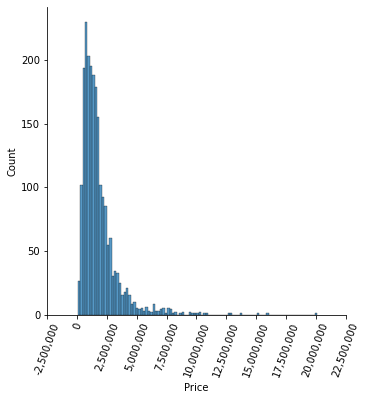

In [1102]:
fig1 = sns.displot(data=data, x='Price')
ticks = fig1.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks]
fig1.set_xticklabels(xlabels, rotation=70)

[Text(0.5, 0, 'Mileage'), Text(0, 0.5, 'Price')]

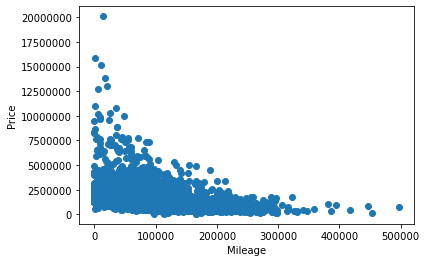

In [1108]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()
ax.scatter(data.auto_mileage, data.Price)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set(xlabel='Mileage', ylabel='Price')


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Price')]

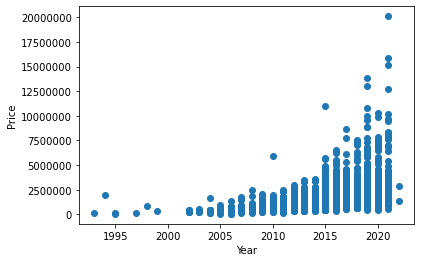

In [1113]:
fig, ax = plt.subplots()
ax.scatter(data.auto_year, data.Price)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set(xlabel='Year', ylabel='Price')

It's clear that higher mileage leads to the lower price.

[Text(0.5, 0, 'Engine_displacement'), Text(0, 0.5, 'Price')]

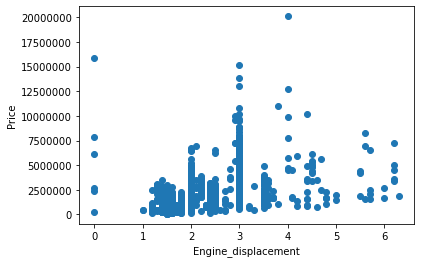

In [1110]:
fig, ax = plt.subplots()
ax.scatter(data.Engine_displacement, data.Price)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set(xlabel='Engine_displacement', ylabel='Price')

[Text(0.5, 0, 'Capacity'), Text(0, 0.5, 'Price')]

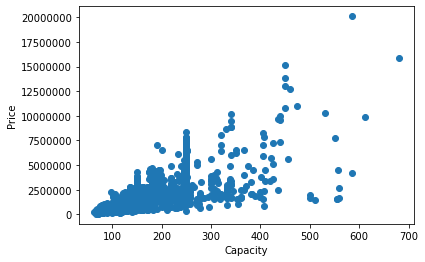

In [1111]:
ыfig, ax = plt.subplots()
ax.scatter(data.Capacity, data.Price)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set(xlabel='Capacity', ylabel='Price')

In [1112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2130
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 2157 non-null   object 
 1   auto_year            2157 non-null   int64  
 2   auto_mileage         2157 non-null   int64  
 3   auto_transmission    2157 non-null   object 
 4   auto_drive_unit      2157 non-null   object 
 5   auto_wheel           2157 non-null   object 
 6   auto_carcase         2157 non-null   object 
 7   auto_color           2157 non-null   object 
 8   link                 2157 non-null   object 
 9   guarantee            2157 non-null   int64  
 10  Engine_displacement  2157 non-null   float64
 11  Capacity             2157 non-null   int64  
 12  Fuel                 2157 non-null   object 
 13  Price                2157 non-null   int64  
 14  owners               2157 non-null   int64  
 15  brand                2157 non-null   o

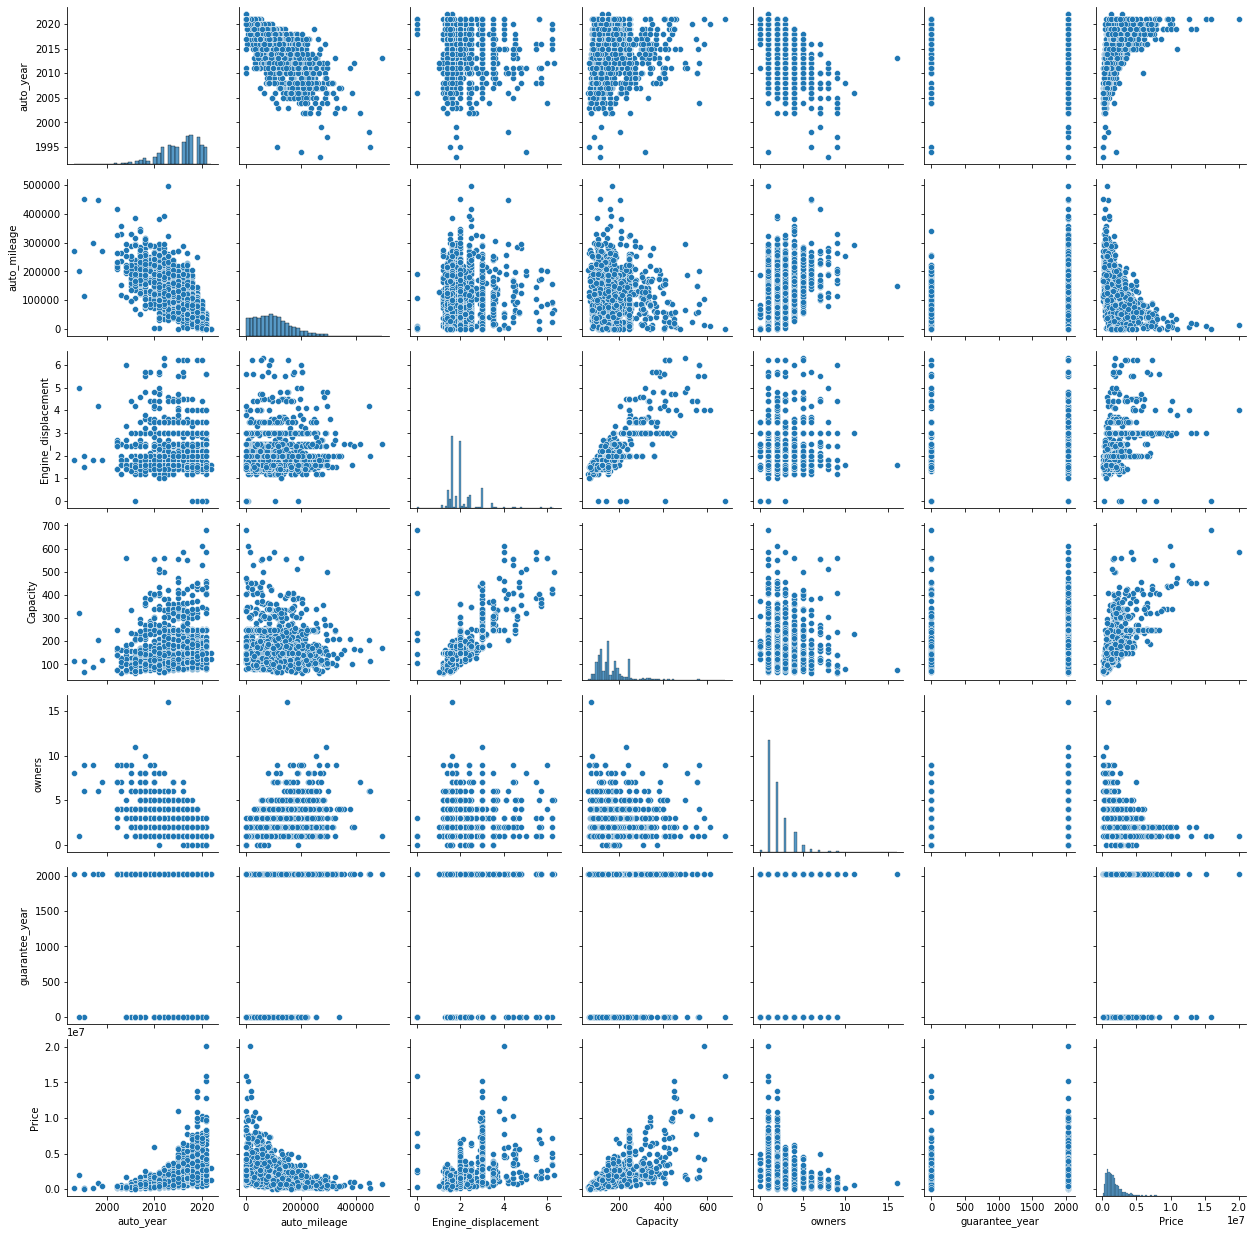

In [1115]:
features = ['auto_year', 'auto_mileage', 'Engine_displacement', 'Capacity', 'owners', 'guarantee_year', 'Price']
g = sns.PairGrid(data[features])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

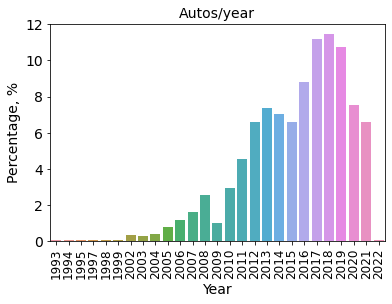

In [1148]:
auto_year_val = (data['auto_year'].value_counts(normalize=True).mul(100).rename('Percent').reset_index())
sns.barplot(x='index', y='Percent', data=auto_year_val)
plt.title('Autos/year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage, %', fontsize=14)

plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=14)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

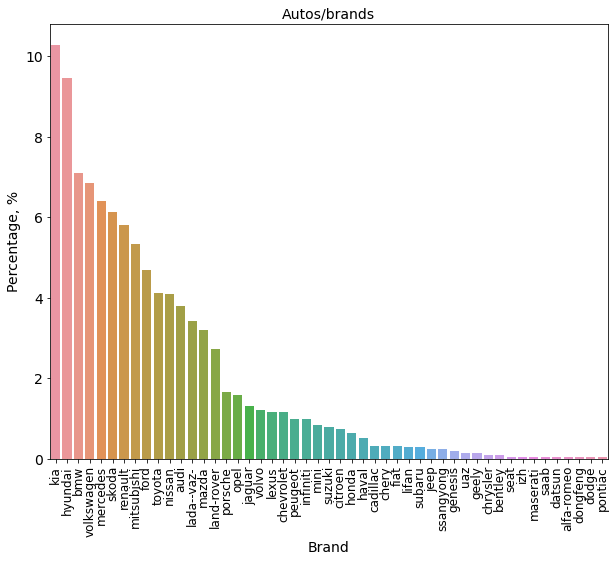

In [1152]:
fig, ax = plt.subplots(figsize=(10, 8))
auto_brand = (data['brand'].value_counts(normalize=True).mul(100).rename('Percent').reset_index())
sns.barplot(ax=ax, x='index', y='Percent', data=auto_brand)
plt.title('Autos/brands', fontsize=14)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Percentage, %', fontsize=14)

plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=14)
#auto_brand.sort_values(by='Percent', ascending=False)

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

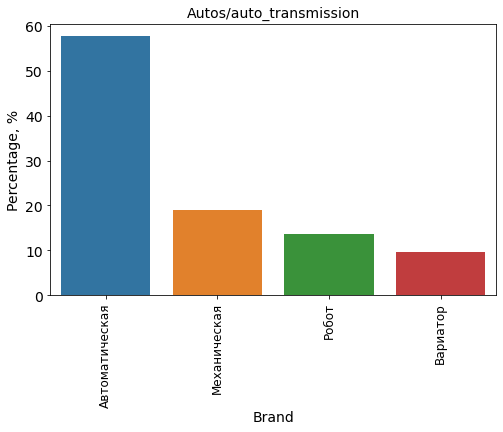

In [1154]:
fig, ax = plt.subplots(figsize=(8, 5))
auto_brand = (data['auto_transmission'].value_counts(normalize=True).mul(100).rename('Percent').reset_index())
sns.barplot(ax=ax, x='index', y='Percent', data=auto_brand)
plt.title('Autos/auto_transmission', fontsize=14)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Percentage, %', fontsize=14)

plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=14)


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

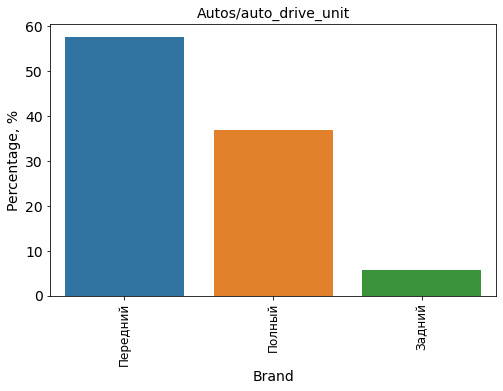

In [1155]:
fig, ax = plt.subplots(figsize=(8, 5))
auto_brand = (data['auto_drive_unit'].value_counts(normalize=True).mul(100).rename('Percent').reset_index())
sns.barplot(ax=ax, x='index', y='Percent', data=auto_brand)
plt.title('Autos/auto_drive_unit', fontsize=14)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Percentage, %', fontsize=14)

plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=14)
